In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)

In [2]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [3]:
y


array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

In [4]:

y.shape

(70000,)

In [5]:
X.shape

(70000, 784)

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

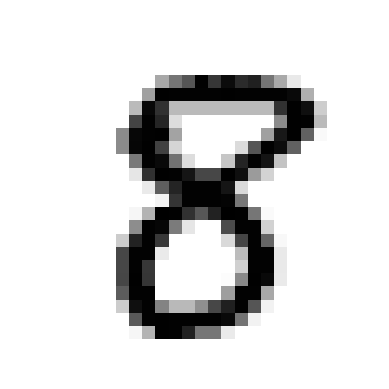

In [7]:
some_digit = X[333]
plot_digit(some_digit)

In [8]:
y[0]

'5'

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
y_train_8 = (y_train=="8")
y_test_8 = (y_test=="8")

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

array([0.909  , 0.9286 , 0.88285])

In [14]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_8)
print(any(dummy_clf.predict(X_train)))

False


In [15]:
cross_val_score(dummy_clf, X_train, y_train_8, cv=3, scoring='accuracy')

array([0.9025 , 0.9025 , 0.90245])

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_8):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_8[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_8[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.909
0.9286
0.88285


In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_8, y_train_pred)
cm

array([[50006,  4143],
       [ 1448,  4403]])

In [21]:
y_train_perfect_predictions = y_train_8
confusion_matrix(y_train_8, y_train_perfect_predictions)

array([[54149,     0],
       [    0,  5851]])

In [22]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_8, y_train_pred)

0.515211794991809

In [23]:
recall_score(y_train_8, y_train_pred)

0.7525209365920356

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_8, y_train_pred)

0.6116552059456831

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([4795.67435018])

In [27]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [29]:
threshold = 5000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3, method="decision_function")

In [31]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)

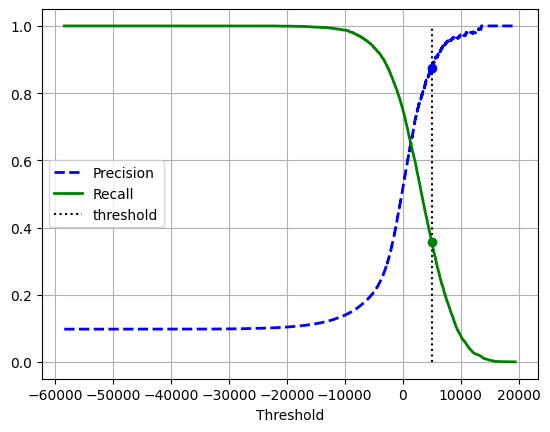

In [46]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.plot(threshold, precisions[:-1][thresholds.searchsorted(threshold)], "bo")
plt.plot(threshold, recalls[:-1][thresholds.searchsorted(threshold)], "go")

plt.grid(visible=True,axis="both")
plt.xlabel("Threshold")
plt.legend()
plt.show()